In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./GlossBERT/Training_Corpora/SemCor/semcor.csv", delimiter="\t", header=0)

In [43]:
print(f"Number of examples: {df.shape[0]}")
print(f"Unique sentences: {len(df.sentence.unique())}")
print(f"Unique sense keys: {len(df.sense_key.unique())}")
print(f"Unique lemmas: {len(df.target_lemma.unique())}")

Number of examples: 226036
Unique sentences: 36216
Unique sense keys: 33316
Unique lemmas: 20399


<AxesSubplot:xlabel='target_pos', ylabel='count'>

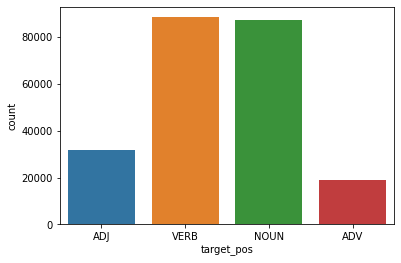

In [6]:
import seaborn as sns

sns.countplot(x='target_pos', data=df)

In [7]:
from nltk.corpus import wordnet as wn

In [8]:
df.head(50)

,sentence,target_index_start,target_index_end,target_id,target_lemma,target_pos,sense_key
0,How long has it been since you reviewed the ob...,1,2,d000.s000.t000,long,ADJ,long%3:00:02::
1,How long has it been since you reviewed the ob...,4,5,d000.s000.t001,be,VERB,be%2:42:03::
2,How long has it been since you reviewed the ob...,7,8,d000.s000.t002,review,VERB,review%2:31:00::
3,How long has it been since you reviewed the ob...,9,10,d000.s000.t003,objective,NOUN,objective%1:09:00::
4,How long has it been since you reviewed the ob...,12,13,d000.s000.t004,benefit,NOUN,benefit%1:21:00::
5,How long has it been since you reviewed the ob...,14,15,d000.s000.t005,service,NOUN,service%1:04:07::
6,How long has it been since you reviewed the ob...,15,16,d000.s000.t006,program,NOUN,program%1:09:01::
7,Have you permitted it to become a giveaway pro...,2,3,d000.s001.t000,permit,VERB,permit%2:41:00::
8,Have you permitted it to become a giveaway pro...,5,6,d000.s001.t001,become,VERB,become%2:42:01::
9,Have you permitted it to become a giveaway pro...,7,8,d000.s001.t002,giveaway,NOUN,giveaway%1:21:00::


In [9]:
ex_1 = df.iloc[29, :]
print(ex_1.sentence)
sense_def = wn.synset_from_sense_key(ex_1.sense_key).definition()
print(f"Sense definition: {sense_def}")
# I don't think this is the correct sense of 'grievance'

Do you measure its relation to reduced absenteeism , turnover , accidents , and grievances , and to improved quality and output ?
Sense definition: an unfortunate mishap; especially one causing damage or injury


In [10]:
lemma = 'erupt'

print(f"Lemma - {lemma}")
for i, g in df[df.target_lemma == lemma].groupby('sense_key'):
    sense_key = g.sense_key.iloc[0]
    synset = wn.synset_from_sense_key(sense_key)
    definition = synset.definition()
    examples = [x for x in synset.examples() if lemma in x]
    print(f"- Sense: {definition}")
    print('- WSD annotated sentences')
    for i, row in g.iterrows():
        print(row.sentence)
    if len(examples) > 0:
        print('- WN Examples')
    for ex in examples:
        print(ex)
    print('                 ')
print("------------------------------")

Lemma - erupt
- Sense: become active and spew forth lava and rocks
- WSD annotated sentences
One of the wagons erupted a massive pillar of flame .
- WN Examples
Vesuvius erupts once in a while
                 
- Sense: start abruptly
- WSD annotated sentences
A bevy of interlacing lagers , work camps , concentration camps erupted in the area .
Presently the well-armed members of the Force Publique - many of them drawn from savage and even cannibalistic tribes , erupted in mutiny , rioting , raping and looting .
It is not a tool for dealing with these crises after they have erupted .
The Kennedy administration moves haltingly toward a Geneva conference on Laos just as serious debate over its foreign policy erupts for the first time .
A truth-revealing crisis erupted in Katanga for a couple of days this month , to be quickly smothered by the high pressure verbal fog that is kept on tap for such emergencies .
That was something of an understatement in a week when the underlying conflict 

In [11]:
df_sent_cls = pd.read_csv("./GlossBERT/Training_Corpora/SemCor/semcor_train_sent_cls.csv", delimiter="\t", header=0)

In [12]:
df_sent_cls_ws = pd.read_csv("./GlossBERT/Training_Corpora/SemCor/semcor_train_sent_cls_ws.csv", delimiter="\t", header=0)

In [13]:
df_token_cls = pd.read_csv("./GlossBERT/Training_Corpora/SemCor/semcor_train_token_cls.csv", delimiter="\t", header=0)

In [14]:
s = wn.synsets('dog')[0]

In [15]:
import numpy as np

synset_examples = {}
for i, row in df.iterrows():
    synset = wn.synset_from_sense_key(row.sense_key)
    name = synset.name()
    lemma = row.target_lemma
    if type(lemma) == str:
        if name not in synset_examples.keys():
            synset_examples[name] = 0
        examples = [x for x in synset.examples() if lemma in x]
        synset_examples[name] += len(examples)

In [16]:
print(f"Unique synsets: {len(synset_examples.keys())}")

Unique synsets: 25916


In [17]:
n_examples = 0
n_synsets_w_examples = 0
for k, v in synset_examples.items():
    if v > 0:
        n_synsets_w_examples +=1
    n_examples += v
print(f"N. synsets with examples: {n_synsets_w_examples}")
print(f"Total n. of examples: {n_examples}")

N. synsets with examples: 12057
Total n. of examples: 224522


In [22]:
eva_df = pd.read_csv("../GlossBERT/Evaluation_Datasets/ALL/ALL.csv", delimiter="\t", header=0)

In [42]:
print(f"Number of examples: {eva_df.shape[0]}")
print(f"Unique sentences: {len(eva_df.sentence.unique())}")
print(f"Unique sense keys: {len(eva_df.sense_key.unique())}")
print(f"Unique lemmas: {len(eva_df.target_lemma.unique())}")

Number of examples: 7253
Unique sentences: 1093
Unique sense keys: 3520
Unique lemmas: 2659


<AxesSubplot:xlabel='target_pos', ylabel='count'>

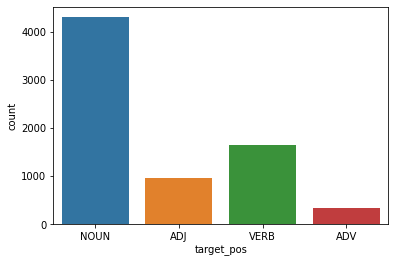

In [30]:
sns.countplot(x='target_pos', data=eva_df)

In [37]:
print(f"'Seen' lemmas {len(set(df.target_lemma.unique()).intersection(set(eva_df.target_lemma.unique())))}")
print(f"'Seen' sense keys {len(set(df.sense_key.unique()).intersection(set(eva_df.sense_key.unique())))}")

'Seen' lemmas 2302
'Seen' sense keys 2763


In [38]:
print(f"'Unseen' lemmas {len(set(eva_df.target_lemma.unique()).difference(set(df.target_lemma.unique())))}")
print(f"'Unseen' sense keys {len(set(eva_df.sense_key.unique()).difference(set(df.sense_key.unique())))}")

'Unseen' lemmas 357
'Unseen' sense keys 757


In [40]:
set(eva_df.target_lemma.unique()).difference(set(df.target_lemma.unique()))

{'1970s',
 '3d',
 '55th',
 'accountability',
 'acne',
 'activist',
 'addiction',
 'additional',
 'adviser',
 'aftershock',
 'agreeable',
 'altar',
 'anaesthetist',
 'anticancer',
 'antiemetic',
 'antimetabolite',
 'appeals_court',
 'asbestos',
 'assistant_professor',
 'astrobiology',
 'auction',
 'audacious',
 'bacterium',
 'banality',
 'banking',
 'beforehand',
 'bell_ringer',
 'bell_ringing',
 'bell_tower',
 'biochemistry',
 'bitch',
 'blare',
 'blood_count',
 'bloodshot',
 'booklet',
 'bowel',
 'broadcaster',
 'building_block',
 'bulletin_board',
 'bush_administration',
 'business_school',
 'calif.',
 'cancer_cell',
 'cancerous',
 'carillon',
 'carnival',
 'case_study',
 'central_america',
 'ceo',
 'cervix',
 'challenger',
 'change_hands',
 'change_ringing',
 'chemotherapy',
 'childcare',
 'chromosome',
 'climate_change',
 'community_property',
 'compatibility',
 'complementarity',
 'constituency',
 'cos',
 'costa_rica',
 'coughing',
 'courthouse',
 'courtroom',
 'credit_union',
 'c

In [56]:
total_n_synsets = 0
for s in wn.all_synsets():
    total_n_synsets += 1
print(total_n_synsets)

total_n_lemma_names = 0
for l in wn.all_lemma_names():
    total_n_lemma_names +=1
print(total_n_lemma_names)

117659
147306


In [62]:
print(f"Fraction of sense keys in training data: {len(df.sense_key.unique()) / total_n_synsets}")
print(f"Fraction of sense keys in test data: {len(eva_df.sense_key.unique()) / total_n_synsets}")
print(f"Fraction of lemmas in training data: {len(df.target_lemma.unique()) / total_n_lemma_names}")
print(f"Fraction of lemmas in test data: {len(eva_df.target_lemma.unique()) / total_n_lemma_names}")

Fraction of sense keys in training data: 0.2831572595381569
Fraction of sense keys in test data: 0.029916963428212037
Fraction of lemmas in training data: 0.13848044207296376
Fraction of lemmas in test data: 0.01805086011431985
